In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\mk744\Downloads\Pokket_xo_22_to_27.csv")
df.columns.tolist()

['actionId',
 'afprice',
 'browser',
 'city',
 'comment',
 'country',
 'currency',
 'date',
 'device',
 'goal',
 'goalValue',
 'holdDateExpire',
 'ip',
 'offer_title',
 'os',
 'revenue',
 'status',
 'sub1',
 'sub2',
 'sub3',
 'sub4',
 'sub5',
 'sub6',
 'sub7',
 'sub8',
 'ua',
 'expanded']

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import os

In [4]:
X = df.drop(columns= 'sub1')
y = df.sub1.copy()
print(X.shape, y.shape)

(100, 26) (100,)


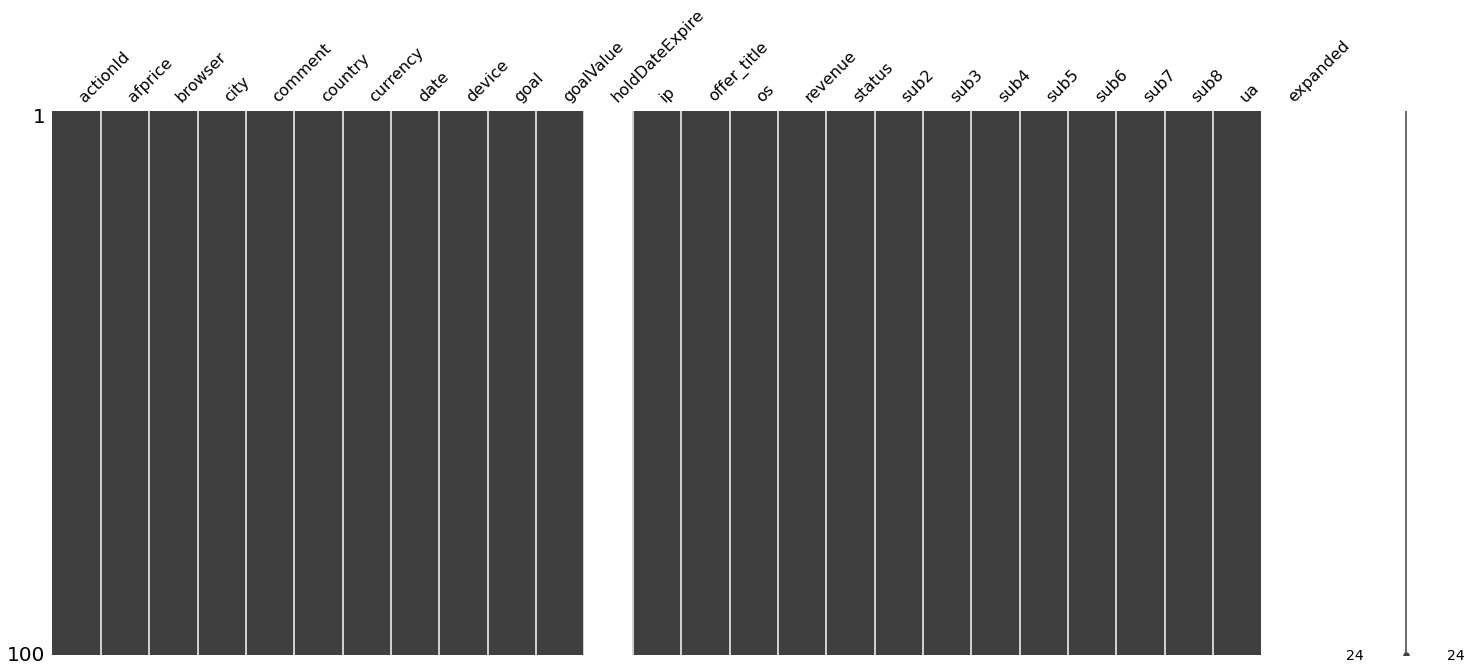

In [5]:
msno.matrix(X)
plt.show()

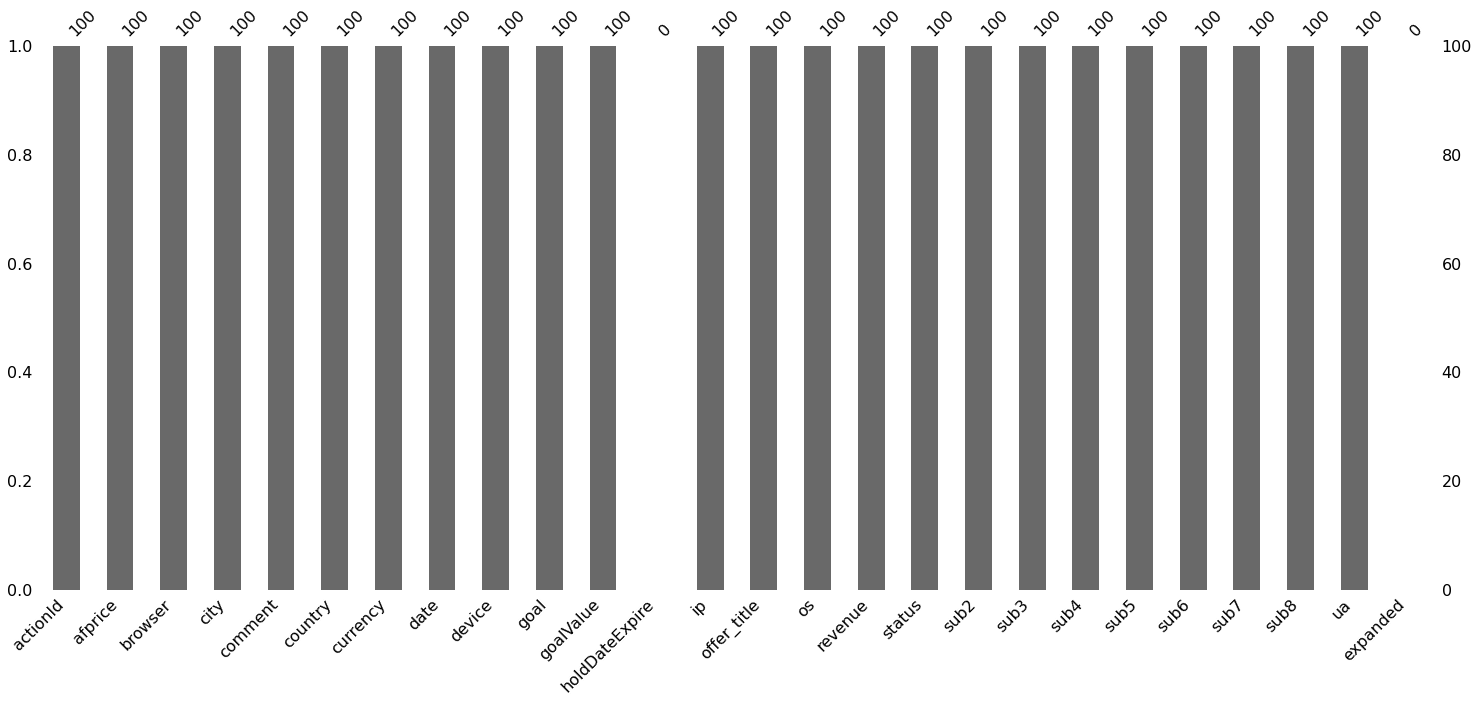

In [6]:
msno.bar(X)
plt.show()

In [7]:

def missing_info(data):
     """
     Description:
     -----------
     This function will accept a dataframe and return a dataframe describing info about
     The output dataframe will show the count and percentage of missing values in each
     with the feature name as index.
     The percentages are with respect to the total no. of observations in the given da
     Parameters:
     ----------
     data: dataframe
     Input dataframe
     """
     na_cols = [col for col in data.columns if data[col].isna().any()]
     na_frequencies = [data[col].isna().sum() for col in na_cols]
     na_percentages = [data[col].isna().mean() for col in na_cols]
     return (
          pd.
          DataFrame(data={
               "column": na_cols,
               "count": na_frequencies,
               "percentage": na_percentages
          })
          .set_index("column")
          .sort_values("count", ascending=False)
          )

# This will show the Frequencies of columns and percentage

In [9]:
def Value_Counts(data):
    # Select columns that have non-zero value counts
    All_cols = [col for col in data.columns if not data[col].value_counts().empty]
    
    # Calculate the frequency of values in each selected column
    Freq_cols = [data[col].value_counts().sum() for col in All_cols]
    
    # Calculate the mean frequency of values in each selected column
    Col_precent = [data[col].value_counts().mean() for col in All_cols]
    
    # Create a DataFrame to hold the results
    result_df = pd.DataFrame({
        'Column': All_cols,
        'Frequency': Freq_cols,
        'Mean Frequency': Col_precent
    })
    
    return result_df

In [10]:
Value_Counts(X)

,Column,Frequency,Mean Frequency
0,actionId,100,1.000000
1,afprice,100,25.000000
2,browser,100,9.090909
3,city,100,3.846154
4,comment,100,100.000000
5,country,100,11.111111
6,currency,100,25.000000
7,date,100,1.851852
8,device,100,100.000000
9,goal,100,20.000000


In [ ]:
missing_info(X)

,count,percentage
column,,
holdDateExpire,100,1.0
expanded,100,1.0


In [ ]:
def plot_missing_info(data,
                      figsize=(6, 4),
                      color="#1745e8",
                      show_bar_labels=True):
     """
     Description:-----------
     This function will accept a dataframe and return a bar plot showing the cou
     in each feature in descending order.
     Parameters:----------
     data: dataframe
          Input dataframe
     figsize = tuple -> (width, height)
               The dimensions of the bar plot figure
     color = str
          Color to use for the bars. Any valid color string will be accepted.
     show_bar_labels: bool
                    Whether to display the count of missing values for each fe
     """
     fig, ax = plt.subplots(figsize=figsize)
     bar =(
     missing_info(data)
     .loc[:, "count"]
     .plot
     .bar(
          color=color,
          
           ax=ax,
        alpha=0.7,
        edgecolor="black"
     )
     )
     ax.set_xlabel("Feature", fontweight="bold", fontsize=11)
     ax.set_ylabel("Count", fontweight="bold", fontsize=11)
     ax.set_title("Missing Values Counts for each Feature", fontweight="bold", fontsize = 15)
     ax.set_xticklabels(
     ax.get_xticklabels(),
     rotation=45,
     ha="right"
     )
     if show_bar_labels:
          containers = bar.containers[0]
          labels = [f"{count:,}" for count in containers.datavalues]
          ax.bar_label(
          containers,
          labels=labels,
          padding=2
     )
     plt.show()

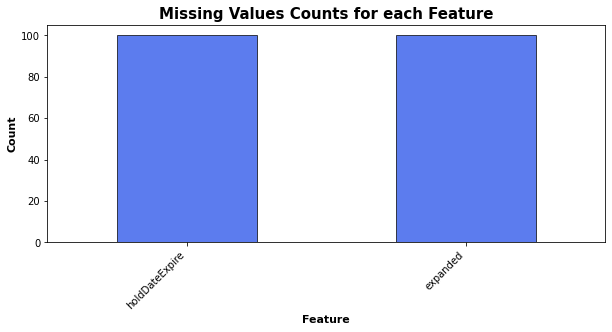

In [ ]:
plot_missing_info(
 X,
 figsize=(10, 4),
 show_bar_labels=False
 )